# Classication using MNIST
Ther aim of this project is to use the MNIST dataset to get a understanding of classication

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

The dataset is not loaded and we can look first at how many entries and then look at what one of entries is 

In [3]:
X= mnist["data"]
y=mnist["target"]
print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (70000, 784)
Shape of y (70000,)


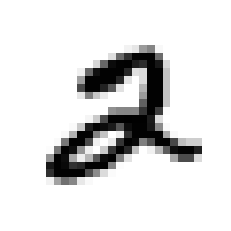

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
digit=X[5]
digit_image=digit.reshape(28,28)
plt.imshow(digit_image,cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [5]:
y[5]

'2'

The image looks like a 5 and the label is a 5 so thats a good start. We will also cast the y list to a int and right now its a string

In [6]:
import numpy as np
y=y.astype(np.uint8)

Now we have some understanding of the dataset we can start to look at modeling. However first we need to slipt the data into a test and train set. This is already done for this data set with the first 60,000 being the train set.

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary Classifier
First we will look at binary classifier for simplicity, we will make a number 2 classifer. I will use the Stochastic Gradient Desent classifer which allows for handling of large data set.

In [8]:
y_train_2=(y_train == 2)
y_test_2=(y_test == 2)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_2)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([digit])

array([ True])

This modle correclty predicts that the digit image from abouve is a 2

### Corss-validation
Using k fold cross-validation is a evaluate the model we have created. This splits the taining set into a number of folds and evaluates the model on one and trains on the rest.

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring="accuracy")

array([0.96645, 0.95895, 0.904  ])

This is fantastic, however only around 10% of all the data are 2s. This means if we were to class all the data as no 2 we would be correct around 90% of the time. This means that accuracy is not preferred for skewed data sets. 

### Confusion matrix
A better evaluation is a confusion matrix. To be able to do this we first need to know the prediction numbers. 

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_2, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2, y_train_pred)

array([[51538,  2504],
       [  908,  5050]], dtype=int64)

In this each column is the predicted class while each row is the actualy class. This can be usefull to make conclussions. 

### Precision and Recall 
A confusion matric is useful but sometimes it is good to have a concise metric. This can be done with precision and recall.


In [14]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_2, y_train_pred)

0.6685199894095843

In [15]:
recall_score(y_train_2, y_train_pred)

0.8475998657267539

These can be combined into one score called the F1 score

In [16]:
from sklearn.metrics import f1_score
f1_score(y_train_2, y_train_pred)

0.7474837181764358

### Precision and recall plot
Unfortunarty as one of these metrics increases the other decreases. This means that there is a tradeoff between the two. It is then useful to sometimes plot these and find the crossing point.

In [17]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3,method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

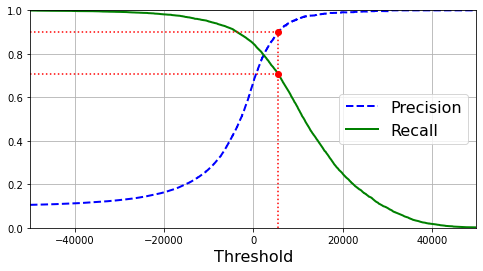

In [18]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)       
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])            



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                               
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")        
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                              
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                          
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.show()

### ROC
The final common toll used in the receiver operating charateritic plot. This plots true positive rate (recall) against false positive rate, this is the ratio of negative instances that are incorrectly classified as positive rate. 

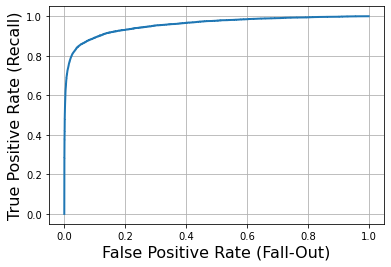

In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_2,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)  

plot_roc_curve(fpr,tpr)
plt.show()

You can get a metric from this plot and is called the area under the curve. If it is equal to 1 it would be perfect classifier while 0.5 is random chance.

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_2, y_scores)

0.9568395257681235

## Multiclass Classification
Before we have just dealt with just a binary classifier, now we move to multiclass. Some algorithms are able to surport this in skit learn such as SGD classifiers and Random Forest classifiers while some cant such as SVM and Logistic regression.  

In [23]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([digit])

array([2], dtype=uint8)

This runs a number of binary classifiers and selects the highest score.  

In [25]:
digit_scores = svm_clf.decision_function([digit])
digit_scores

array([[ 2.7442516 , -0.30125634,  9.31399134,  7.26965016,  3.75753908,
         3.74771902,  0.71155138,  2.76650678,  8.2765048 ,  6.21840456]])

These types of classifier run in 2 different ways, these are One Vs One classifier and One vs Rest classifier. You can force different type on the classifer by the following way

In [ ]:
from sklearn.multiclass import OneVsRestClassifier 
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict([digit])

You can test these classifier using corss validation 

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

This can be improved further just by scaling the input

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")